In [2]:
import matplotlib.pyplot as plt             
from tabulate import tabulate              
import matplotlib as mat                   
import seaborn as sns                      
import pandas as pd 
import numpy as np 

In [3]:
df = pd.read_csv("brazil_data.csv")

In [4]:
df.head(2)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973


In [5]:
df.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165,22,1587


## Level 0 Analysis

In [6]:
df.shape

(10692, 13)

In [7]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [8]:
df.info

<bound method DataFrame.info of                  city  area  rooms  bathroom  parking spaces  floor  \
0           São Paulo    70      2         1               1      7   
1           São Paulo   320      4         4               0     20   
2        Porto Alegre    80      1         1               1      6   
3        Porto Alegre    51      2         1               0      2   
4           São Paulo    25      1         1               0      1   
...               ...   ...    ...       ...             ...    ...   
10687    Porto Alegre    63      2         1               1      5   
10688       São Paulo   285      4         4               4     17   
10689  Rio de Janeiro    70      3         3               0      8   
10690  Rio de Janeiro   120      2         2               2      8   
10691       São Paulo    80      2         1               0      0   

          animal      furniture  hoa (R$)  rent amount (R$)  \
0          acept      furnished      2065           

In [9]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

## LEVEL 1 Analysis

## Separating Categorical and Numerical Variables

In [10]:
a= df.select_dtypes(exclude='object')
b= df.select_dtypes(include='object')

a_lst=list(a.columns)
b_lst=list(b.columns)

table= [b_lst,a_lst]

print(tabulate({"Categorical":b_lst,
               "numerical":a_lst},headers=["categorical","numerical"]))

categorical    numerical
-------------  -------------------
city           area
animal         rooms
furniture      bathroom
               parking spaces
               floor
               hoa (R$)
               rent amount (R$)
               property tax (R$)
               fire insurance (R$)
               total (R$)


### Func for info about categ columns

In [11]:
def info_of_cat(col): 
    print (f"Unique values in {col} are: {df[col].unique()}") 
    print(f"Mode of {col} is {df[col].mode()[0]}")
    print (f"Number of missing values in (col) is {df[col].isnull().sum()}")
    if df[col].isnull().sum() > 0:
        print("\nThere are null values in the {col} column")

### Func for info about numeric columns i.e mean,median,mode,sd,null values

In [12]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

### Func for getting percentage in bar graph

In [13]:
def bar_percentage(ax, count: "number of rows in data "):
    for bar in ax.patches:                                           
        percentage = f"{round((bar.get_height() / count) *100, 2)}%" 
                                                                     
        x = bar.get_x() + bar.get_width() /2                         
        y = bar.get_height()                                         
        ax.annotate(percentage, (x, y), va = "bottom", ha = "center") 
                                                                     
 
    plt.show()

## Analysis of Cities

In [14]:
info_of_cat("city")

Unique values in city are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode of city is São Paulo
Number of missing values in (col) is 0


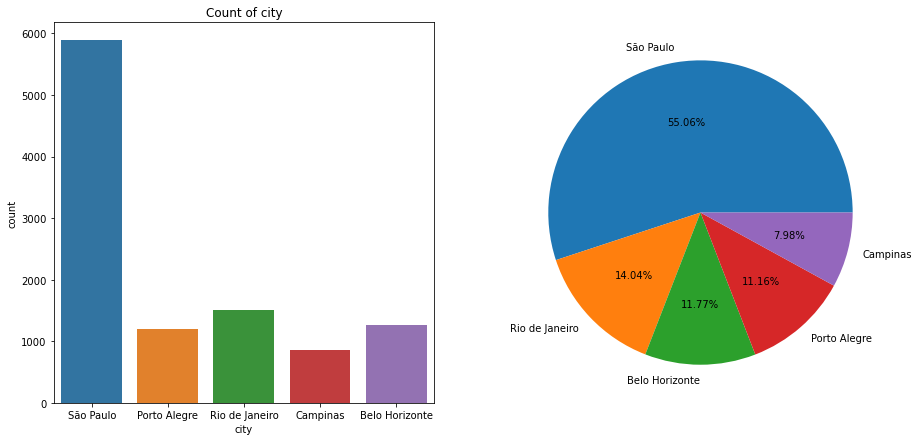

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of city")                  # Set the title of the graph
percentage = df["city"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["city"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["city"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

## Analysis of Animal acceptancy

In [16]:
info_of_cat("animal")

Unique values in animal are: ['acept' 'not acept']
Mode of animal is acept
Number of missing values in (col) is 0


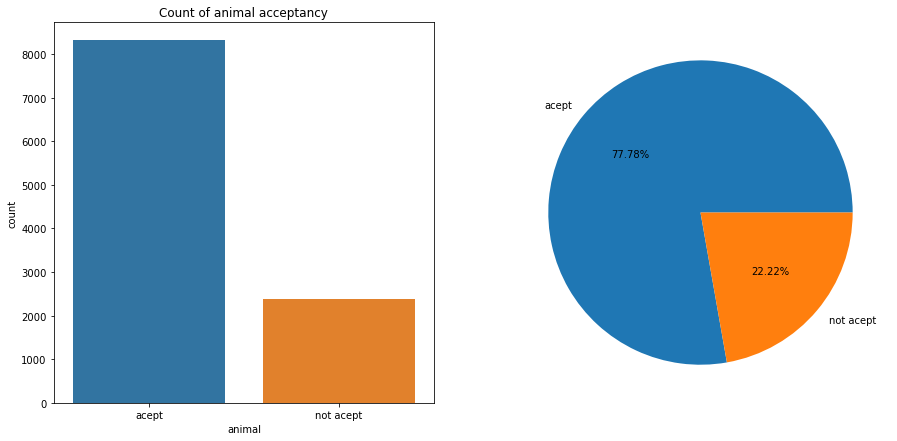

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of animal acceptancy")               
percentage = df["animal"].value_counts()         
labels = list(df["animal"].value_counts().index)

sns.countplot(x = df["animal"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 

plt.show()

### We can Interpret from the above graphs that majority (approx 78%) of people accept animals in the house.

## Analysis of Furnishing in the house

In [18]:
info_of_cat("furniture")

Unique values in furniture are: ['furnished' 'not furnished']
Mode of furniture is not furnished
Number of missing values in (col) is 0


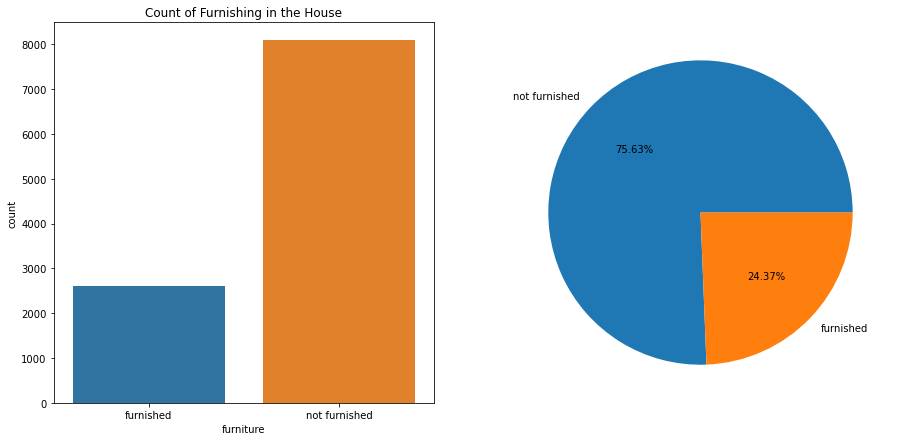

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Furnishing in the House")               
percentage = df["furniture"].value_counts()         
labels = list(df["furniture"].value_counts().index)

sns.countplot(x = df["furniture"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 

plt.show()

### Interpretation: Majority of homes come with furniture about approx 76% of homes. 24% of homes does not come with furniture for obvious reasons.

## Analysis of Area of homes

In [20]:
info_of_numerical("area")

The mean of the area is 149.21791994014217
The median of the area is 90.0
The mode of the area is 50
The standard deviation of the area is 537.0169423364867
Number of missing values in the area is 0


### We can see clearly that the average area of  a home is approx 150 

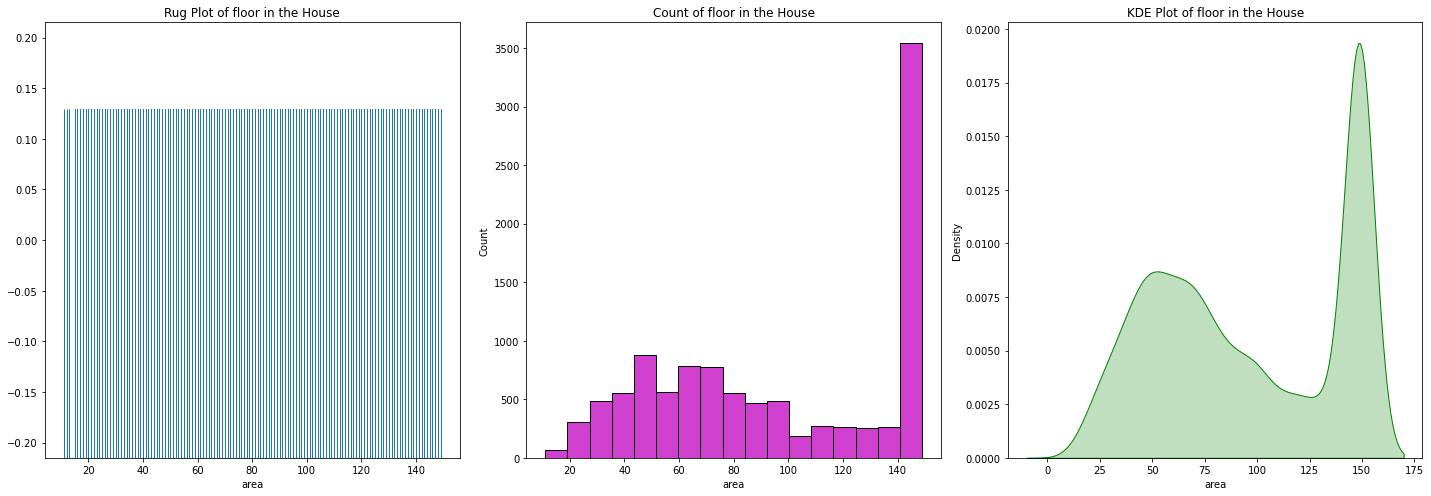

In [21]:
mean = int(df.area.mean()) 
x=df[df["area"] > 149].index

df.loc[x, "area"] =mean

fig, ax = plt.subplots(1, 3, figsize= (20, 7))
ax[0].set_title("Rug Plot of floor in the House")
ax[1].set_title("Count of floor in the House")
ax[2].set_title("KDE Plot of floor in the House")
sns.histplot(x = df["area"], ax =ax[1], color = "m")
sns.kdeplot(df ['area'], ax=ax[2],shade=True,color='g') 
sns.rugplot(df ['area'], ax=ax[0],height=0.8)
#plt.show()
plt.tight_layout()

### Interpretation: Majority of people are are living in a small area ie. density of population is more in area between approx 75 to 85

## Analysis of Parking Space of homes

In [22]:
info_of_cat("parking spaces")

Unique values in parking spaces are: [ 1  0  7  4  2  6  3  8  5 10 12]
Mode of parking spaces is 1
Number of missing values in (col) is 0


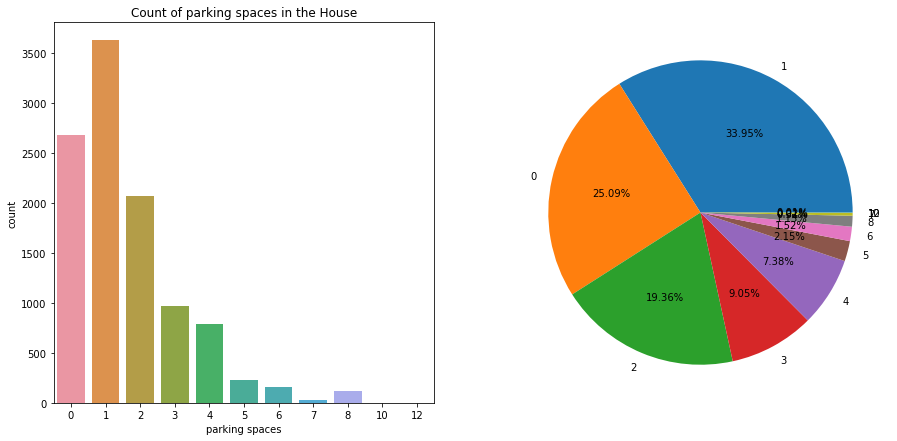

In [23]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of parking spaces in the House")               
percentage = df["parking spaces"].value_counts()         
labels = list(df["parking spaces"].value_counts().index)

sns.countplot(x = df["parking spaces"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 

plt.show()

## Analysis of bathrooms

In [24]:
info_of_numerical("bathroom")

The mean of the bathroom is 2.2368125701459034
The median of the bathroom is 2.0
The mode of the bathroom is 1
The standard deviation of the bathroom is 1.4071981983604243
Number of missing values in the bathroom is 0


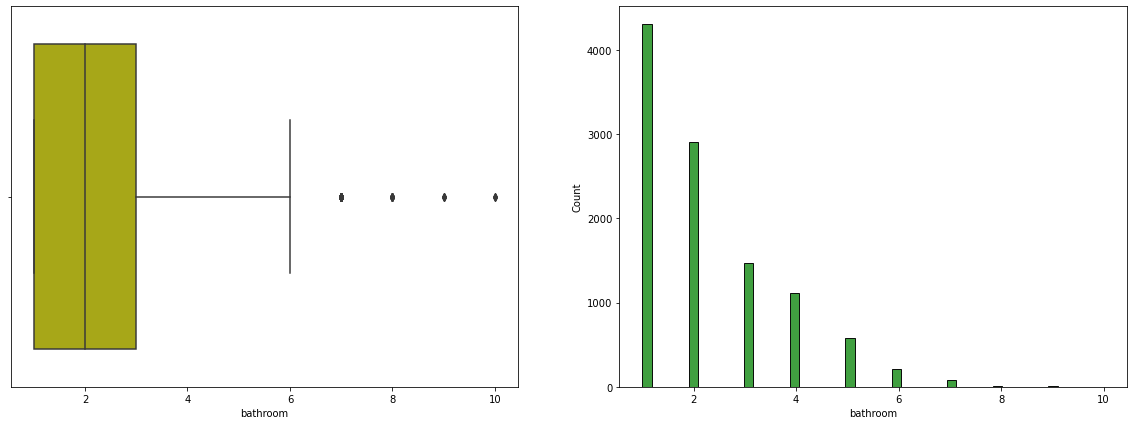

In [25]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))
sns.histplot(df["bathroom"], ax = ax[1], color= "g")
sns.boxplot(x = df['bathroom'], ax = ax[0], color = "y")
plt.show()

### Majority of the houses have atleast 1 bathroom, which is a basic necessity.
### There are outliers in the no of bathrooms; it may be interpreted that these may be mansions.

## Analysis of total Floors

In [26]:
info_of_numerical("floor")

The mean of the floor is 5.0679947624392065
The median of the floor is 3.0
The mode of the floor is 0
The standard deviation of the floor is 6.069050243218268
Number of missing values in the floor is 0


### Outlier Treatment

In [27]:
np.where((df['floor']>100))



(array([2562], dtype=int64),)

In [28]:
odf= df[(df['floor'] < 100)]
odf['floor'].describe()

count    10691.000000
mean         5.040314
std          5.351985
min          0.000000
25%          1.000000
50%          3.000000
75%          8.000000
max         51.000000
Name: floor, dtype: float64

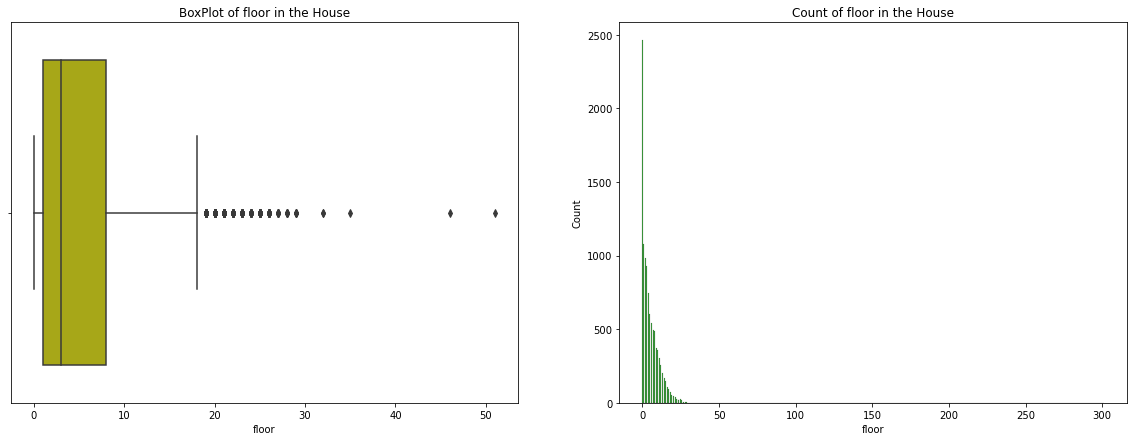

In [29]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))
ax[0].set_title("BoxPlot of floor in the House")
ax[1].set_title("Count of floor in the House")
sns.histplot(df["floor"], ax = ax[1], color= "g")
sns.boxplot(x = odf['floor'], ax = ax[0], color = "y")
plt.show()

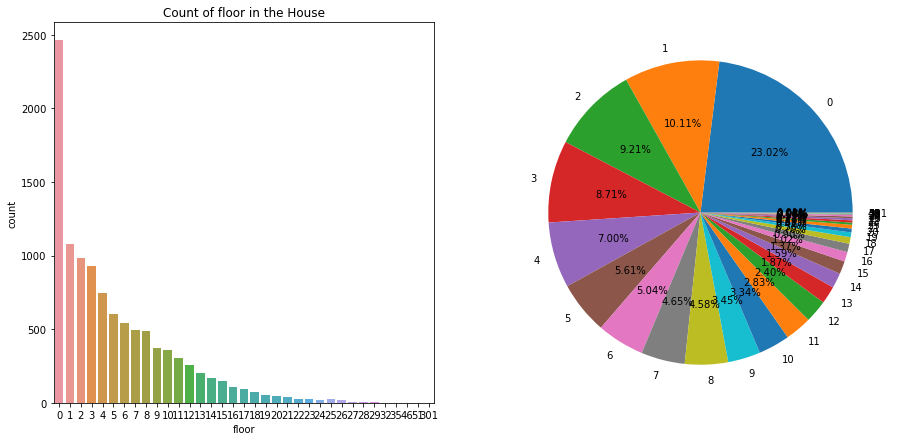

In [30]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of floor in the House")               
percentage = df["floor"].value_counts()         
labels = list(df["floor"].value_counts().index)

sns.countplot(x = df["floor"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 

plt.show()

## Level 2

### Categorical to Categorical

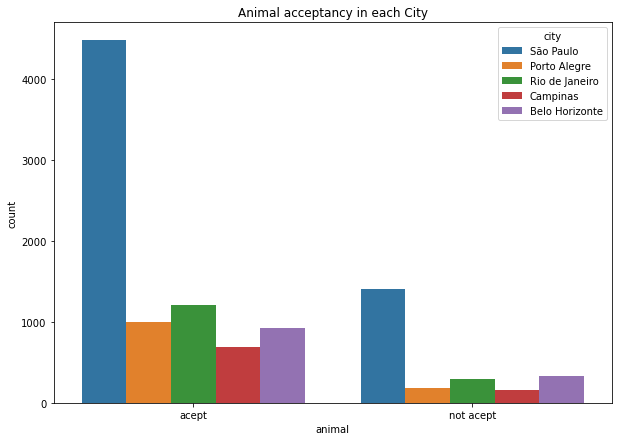

In [31]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.set_title("Animal acceptancy in each City")
sns.countplot(x = "animal", hue = "city", data = df)
plt.show()

### Interpretation: we can see from the above graph that sao paolo is the most accepting of the animals and the least accepting are from campinas city

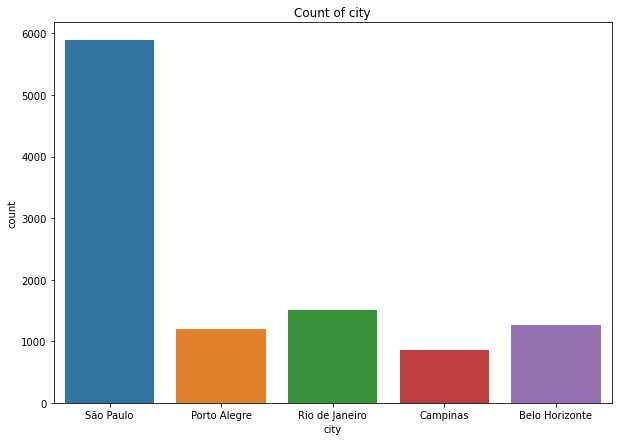

In [32]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.set_title("Count of city")
sns.countplot(x = "city", data = df)
plt.show()

### the above graph shows that majority of people live in sao paolo city

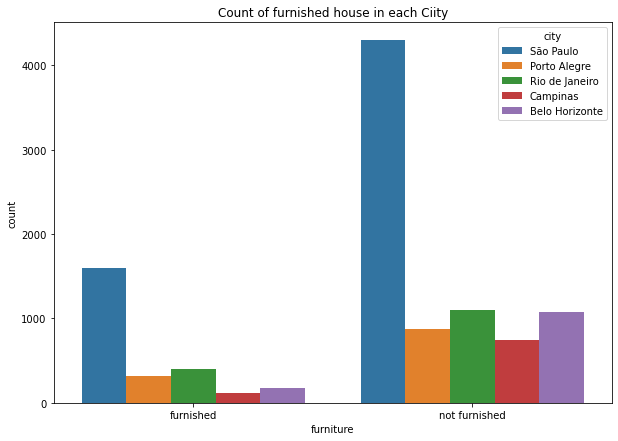

In [33]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.set_title("Count of furnished house in each Ciity")
sns.countplot(x = "furniture", hue = "city", data = df)
plt.show()

### Interpretation: The graph shows that Majority of the homes are not furnished 

### Maximum no of homes are not furnished in saopaolo To be noted that majority of people live in saopaolo

### Categorical to continuous

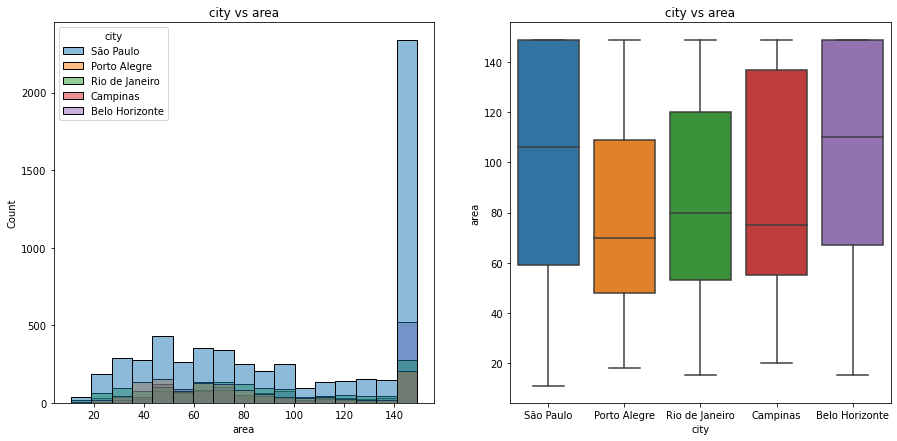

In [34]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["area"], hue = df["city"], ax = ax[0]).set_title('city vs area')
sns.boxplot(y = df["area"], x = df["city"], ax = ax[1]).set_title('city vs area')
plt.show()

KeyboardInterrupt: 

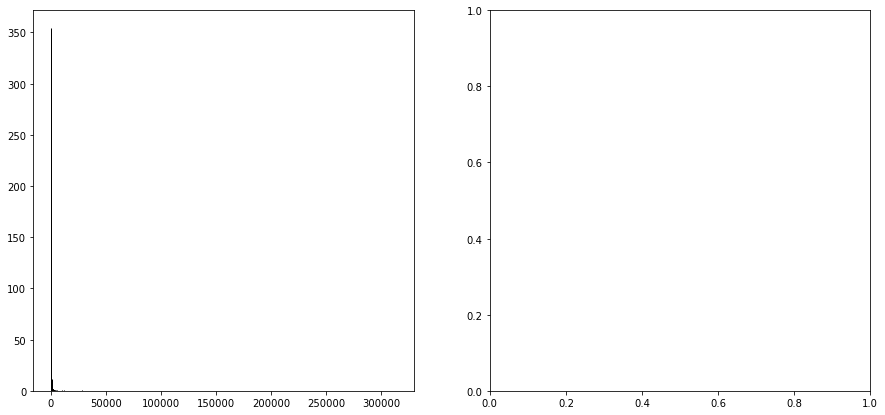

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["property tax (R$)"], hue = df["city"], ax = ax[0]).set_title('city vs tax')
sns.boxplot(y = df["property tax (R$)"], x = df["city"], ax = ax[1]).set_title('city vs tax')
plt.show()

In [ ]:
plt.figure(figsize=(15,7))

sns.barplot(x = df["city"] ,y = df["property tax (R$)"]).set_title("City vs tax")

### Interpretation: the tax rates are high in Sao Paolo as compared to other cities and it is lowest in porto algre. It may be noted that Sao Paolo is a Capital city compared to Porto Alegre which (sub urban).

## Level 3

In [37]:
corr_df=a.corr()

Text(0.5, 1.0, 'Heatmap of Co-relation')

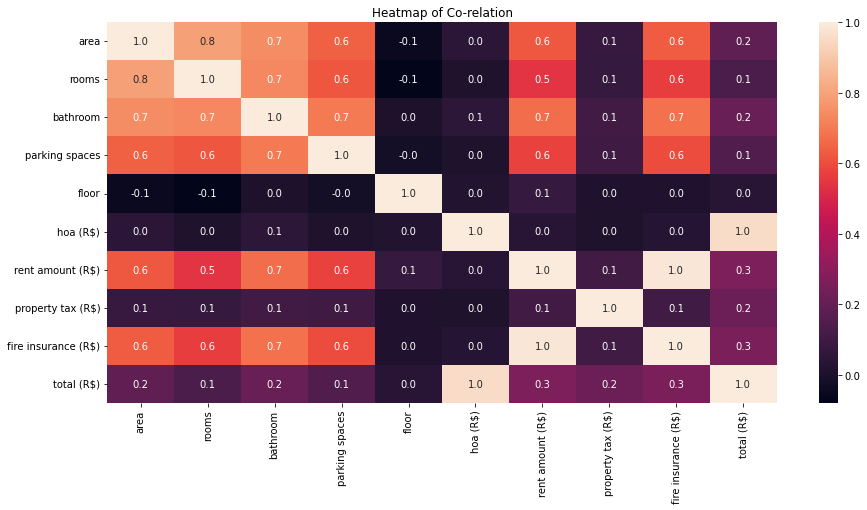

In [38]:
plt.figure(figsize=(15,7))
sns.heatmap(corr_df,annot=True,fmt='.1f',cbar=True).set_title("Heatmap of Co-relation")

### The above heatmap shows the correlation for all the data it ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables (No corelation)

### We can interpret from the above heatmap that area of a home has corelation to every other aspect.

In [95]:
ct=pd.pivot_table(data=df,
index='city',
values=['area','rent amount (R$)','property tax (R$)','fire insurance (R$)','total (R$)'],
aggfunc='mean',
margins=True,
margins_name='Avg')

ct

,area,fire insurance (R$),property tax (R$),rent amount (R$),total (R$)
city,,,,,
Belo Horizonte,73.787758,53.675676,272.782194,3664.127981,6315.242448
Campinas,69.087925,32.388042,147.657679,2364.290739,3173.276671
Porto Alegre,65.691534,36.425817,124.021794,2337.699916,2989.782900
Rio de Janeiro,67.940706,42.483011,256.853431,3232.904064,4611.684877
São Paulo,71.116698,62.428911,495.701716,4652.793783,6380.831833
Avg,70.217920,53.300879,366.704358,3896.247194,5490.487000


### The above table shows the average values for the rent break-up for each city separately.

### Porto Alegre has the lowest rent amount when compared to other cities, it maybe due to the fact that it is a sub urban area .

### The Highest tax collecting city is Sao Paulo

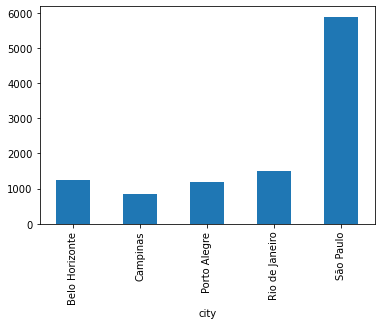

In [115]:
gb= df.groupby(['city']).size().plot(kind = "bar")


In [120]:
df.groupby(['city','furniture']).agg({'total (R$)': ['mean', 'min', 'max']})

total (R$)               
                                     mean   min      max
city           furniture                                
Belo Horizonte furnished      6024.372881   710    27760
               not furnished  6362.868640   499  1120000
Campinas       furnished      3808.918919   897    15610
               not furnished  3078.187332   711    20560
Porto Alegre   furnished      3818.605016   831    18040
               not furnished  2687.272311   509    32750
Rio de Janeiro furnished      6009.556650  1010    95610
               not furnished  4093.387215   507    32180
São Paulo      furnished      7545.463905   932   222100
               not furnished  5948.773405   508   316900

### Interpretation: In Belo Horizonte, the homes which are not furnished are costing more than the furnished ones. also to be noted the max price of house is the highest in this city.

### The costliest city is Sao Paolo where avg rent is approx 7500 for furnished and 5900 for the latter.

### The affordable city is Porto Alegre where rent is approx 3800 for furnished and 2700 for the latter

## Analysis of Total Rent in each city (both furnished and unfurnished)

In [122]:
df.groupby('city').agg({'total (R$)': ['mean', 'min', 'max']})

total (R$)              
                       mean  min      max
city                                     
Belo Horizonte  6315.242448  499  1120000
Campinas        3173.276671  711    20560
Porto Alegre    2989.782900  509    32750
Rio de Janeiro  4611.684877  507    95610
São Paulo       6380.831833  508   316900

In [123]:
df.groupby('city').agg({'property tax (R$)': ['mean', 'min', 'max']})

property tax (R$)            
                            mean min     max
city                                        
Belo Horizonte        272.782194   0   12500
Campinas              147.657679   0    1898
Porto Alegre          124.021794   0    4500
Rio de Janeiro        256.853431   0   28120
São Paulo             495.701716   0  313700

### Interpretation: The maximum Tax collecting city is Sao Paolo followed by Bel Horizonte; The least Tax Collecting city is Porto Alegre

## Final Interpretation: The best cities to relocate considering the high rental amount in Sao Paolo, Rio, and Bel Horizonte; is either Porto Alegre or Campinas.

## If the family prefers a metro city, Bel Horizonte is the preferred city to move in considering the costs.

In [47]:
n= int(input("enter a value: "))

s= np.sqrt(n)

print(s)

enter a value: 4
2.0


In [ ]:
select "column name" from "table name" where ("column name"=='J___' )